- Classification and Regression  
- Supervised Learning  
- No training involved O(1)  
- Non-parametric algorithm (Not going to learn any algorithm)  
- All work in query time O(NlogN) per query  
- Used as baseline algorithm for most problems (if accuracy of algo is less than KNN, then not good) -> Most brute force approach in ML

1) Plot all points  
2) For the query, find the distance of this point from all other points  
3) Sort the neighbours on distance  
4) Choose a value of k and consider majority of the k closest neighbours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
plt.style.use('seaborn')

In [40]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [41]:
X = dfx.values
Y = dfy.values

In [42]:
print(X.shape)
print(Y.shape)

(399, 3)
(399, 2)


In [43]:
X = X[:, 1:]
Y = Y[:, 1:]

In [44]:
print(X.shape)
print(Y.shape)

(399, 2)
(399, 1)


In [45]:
Y = Y.reshape((-1,))

In [46]:
print(Y.shape)
print(Y)
# Two classes - 0 and 1

(399,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

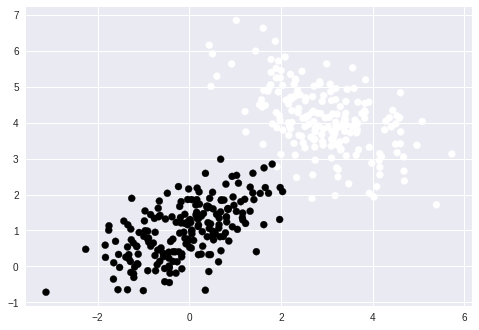

In [47]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [48]:
query_x = np.array([2, 3])

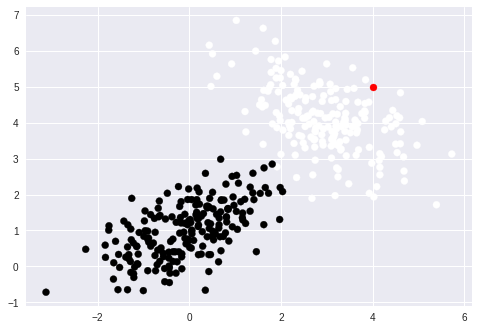

In [64]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(query_x[0], query_x[1], color = 'red')
plt.show()
# Black is class 1, White is class 0 

We'll use Euclidean distance. We can use other distance functions as well.

In [65]:
def dist(x1, x2) :
    return np.sqrt(sum((x1-x2)**2))

In [66]:
def knn(X, Y, queryPoint, k = 5) :
    vals = []
    m = X.shape[0] # Total points
    for i in range(m) :
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    # Nearest/First k points
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    # print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [67]:
print(knn(X, Y, query_x))

0.0


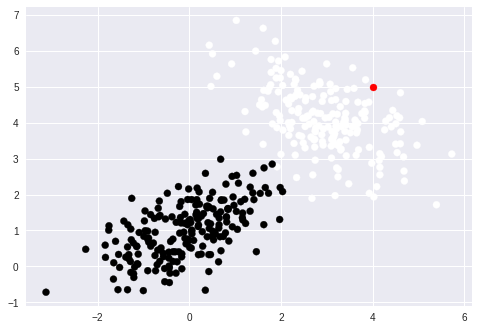

In [68]:
query_x = np.array([4, 5])
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(query_x[0], query_x[1], color = 'red')
plt.show()

In [69]:
print(knn(X, Y, query_x))

0.0


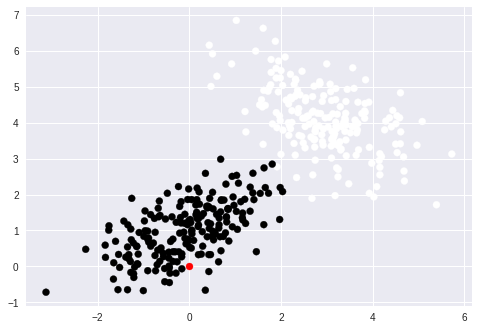

In [70]:
query_x = np.array([0, 0])
plt.scatter(X[:,0], X[:,1], c = Y)
plt.scatter(query_x[0], query_x[1], color = 'red')
plt.show()

In [71]:
print(knn(X, Y, query_x))

1.0
